# Histogram Equilization

## Histogram Equilization from scratch

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def compute_cdf(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    return hist,hist.cumsum()    

In [3]:
def equilize_hist(img):
    hist,cdf = compute_cdf(img)
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    return cdf[img]

In [4]:
img = cv2.imread('imgs/butterfly.jpg',0)
img_equ = equilize_hist(img)

In [5]:
hist,cdf = compute_cdf(img)

In [9]:
def img_plot(img,title="",ax=None):
    ax.imshow(img,cmap="gray")
    ax.set_title(title)
    ax.axis("off")

In [10]:
def hist_plot(img,title="",ax=None):
    hist,cdf = compute_cdf(img)
    cdf_normalized = cdf * hist.max()/ cdf.max()
    ax.hist(img.flatten(),256,[0,256],label="Histogram")
    ax.set_title(title)
    ax.plot(cdf_normalized,label="CDF")
    ax.set_xlabel("Bins")
    ax.legend()

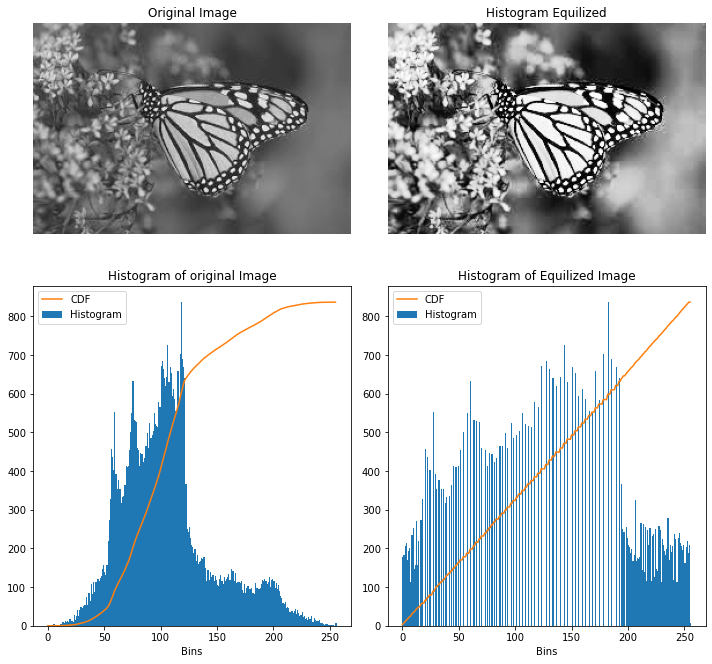

In [11]:
fig, ax =plt.subplots(2,2,figsize=(10,10), gridspec_kw = {"width_ratios":[2,2]})
ax= ax.flat
img_plot(img,"Original Image",ax[0])
img_plot(img_equ,"Histogram Equilized",ax[1])
hist_plot(img,"Histogram of original Image",ax[2])
hist_plot(img_equ,"Histogram of Equilized Image",ax[3])
plt.tight_layout()

## Histogram Equilization using OpenCV

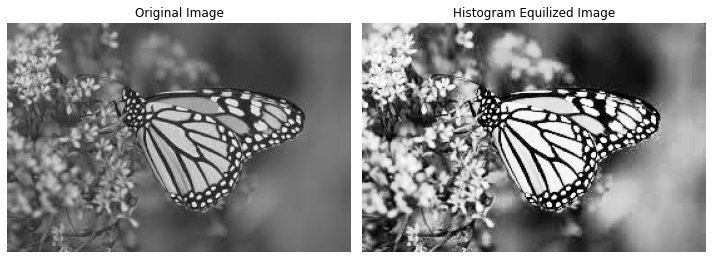

In [12]:
equ= cv2.equalizeHist(img)

fig, ax = plt.subplots(1,2,figsize=(10,10))
img_plot(img,"Original Image", ax[0])
img_plot(equ,"Histogram Equilized Image", ax[1])
plt.tight_layout()


## Masked Histogram Equilization

In [52]:
mask = np.zeros_like(img,bool)
mask_slice = slice(20,80),slice(140,200)
mask[mask_slice] = True
img_masked = img*mask
img_masked_eq = equilize_hist(img_masked)
img_merged = ~mask*img+mask*img_masked_eq

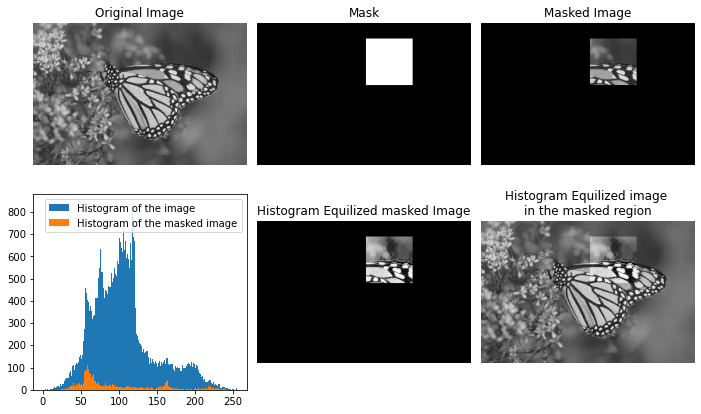

In [82]:
fig,ax = plt.subplots(2,3,figsize = (10,6),tight_layout=True)
img_plot(img,"Original Image",ax[0,0])
img_plot(mask,"Mask",ax[0,1])
img_plot(img_masked,"Masked Image",ax[0,2])
ax[1,0].hist(img.flat,256,(0,255),histtype="bar",label ="Histogram of the image")
ax[1,0].hist(img_masked[mask_slice].flat,256,(0,255),histtype="bar",label = "Histogram of the masked image")
ax[1,0].legend()
img_plot(img_masked_eq,"Histogram Equilized masked Image",ax[1,1])
img_plot(img_merged,"Histogram Equilized image \nin the masked region",ax[1,2])
